In [2]:
import pandas as pd

# Load data
train = pd.read_parquet('train.parquet')
test = pd.read_parquet('test.parquet')

# Inspect data
print(train.head())
print(train.info())
print(train.describe())

        Date        X1        X2   X3        X4        X5 target
0 2020-12-16  1.518921  5.463154  1.0  2.718282  2.890372      0
1 2020-12-16  1.546509  5.458010  1.0  2.718282  2.833213      1
2 2020-12-16  1.645427  5.456560  1.0  7.389056  2.890372      1
3 2020-12-16  1.652022  5.458479  1.0  2.718282  2.890372      1
4 2020-12-16  1.695538  5.466709  1.0  2.718282  2.890372      0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639424 entries, 0 to 1639423
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   Date    1639424 non-null  datetime64[ns]
 1   X1      1639424 non-null  float64       
 2   X2      1639424 non-null  float64       
 3   X3      1639424 non-null  float64       
 4   X4      1639424 non-null  float64       
 5   X5      1639424 non-null  float64       
 6   target  1639424 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 87.6+ MB
None
       

In [3]:
# Extract Year, Month, and Day
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day

print(train)

              Date        X1        X2   X3        X4        X5 target  Year  \
0       2020-12-16  1.518921  5.463154  1.0  2.718282  2.890372      0  2020   
1       2020-12-16  1.546509  5.458010  1.0  2.718282  2.833213      1  2020   
2       2020-12-16  1.645427  5.456560  1.0  7.389056  2.890372      1  2020   
3       2020-12-16  1.652022  5.458479  1.0  2.718282  2.890372      1  2020   
4       2020-12-16  1.695538  5.466709  1.0  2.718282  2.890372      0  2020   
...            ...       ...       ...  ...       ...       ...    ...   ...   
1639419 2024-11-26  1.000000  5.482346  1.0  1.000000  0.000000      0  2024   
1639420 2024-11-26  1.000000  5.486580  1.0  1.000000  0.000000      0  2024   
1639421 2024-11-26  1.000000  5.484797  1.0  1.000000  0.000000      0  2024   
1639422 2024-11-26  1.000000  5.483551  1.0  1.000000  0.000000      0  2024   
1639423 2024-11-26  1.000000  5.482928  1.0  1.000000  0.000000      0  2024   

         Month  Day  
0           12   

In [4]:
train = train.drop(columns=['Date'])

target    1.000000
X5        0.098049
X1        0.096103
X4        0.045209
X3        0.018852
Month     0.002298
Day      -0.002198
Year     -0.033140
X2       -0.163221
Name: target, dtype: float64


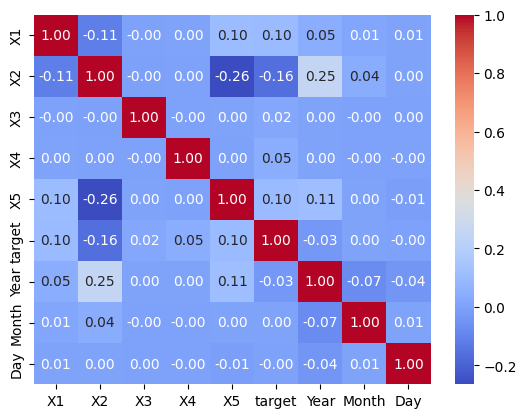

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation
corr = train.corr()

# Visualize correlation with target
corr_target = corr['target'].sort_values(ascending=False)
print(corr_target)

# Optional: Plot correlation matrix heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [6]:
train['target']=train['target'].apply(lambda x: int(x))

In [7]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 MB 5.2 MB/s eta 0:00:00


In [28]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=['target'])
y = train['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Random Forest
# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)

# Hyperparameter tuning for XGBoost
param_grid = {
    'n_estimators': [300],
    'max_depth': [9],
    'learning_rate': [0.2]
}

random_search = RandomizedSearchCV(xgb, param_grid, cv=7, scoring='f1')
random_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=7,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...ne,
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'learning_rate': [0.2],
                                        'max_depth': [9],
                                        'n_estimators': [300]},
                   scoring='f1')

In [30]:
print(random_search.best_params_)
print(random_search.best_score_)

{'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.2}
0.786081840535315


In [31]:
# 0.3 cv=7
#  {'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.2}
# 0.7776020856392675

In [32]:
from sklearn.metrics import classification_report, f1_score

# Evaluate on validation set
print('RandomizedSearchCV')
y_pred = random_search.predict(X_val)
print(classification_report(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
#cv=7

RandomizedSearchCV
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    487682
           1       0.89      0.71      0.79      4146

    accuracy                           1.00    491828
   macro avg       0.95      0.85      0.90    491828
weighted avg       1.00      1.00      1.00    491828

F1 Score: 0.7916106480236623


In [ ]:
#cv = 7     0.3
# {'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.2}
# 0.786081840535315

# RandomizedSearchCV
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00    487682
#            1       0.89      0.71      0.79      4146

#     accuracy                           1.00    491828
#    macro avg       0.95      0.85      0.90    491828
# weighted avg       1.00      1.00      1.00    491828

# F1 Score: 0.7916106480236623

In [ ]:
#cv = 7

# {'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1}
# 0.7714078291597842
# RandomizedSearchCV
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00    325118
#            1       0.91      0.69      0.78      2767

#     accuracy                           1.00    327885
#    macro avg       0.96      0.84      0.89    327885
# weighted avg       1.00      1.00      1.00    327885

# F1 Score: 0.7837391663227404

In [33]:
# Predict on test set
# Extract Year, Month, and Day
test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Day'] = test['Date'].dt.day

In [34]:
test

,ID,Date,X1,X2,X3,X4,X5,Year,Month,Day
0,0,2020-12-16,1.685395,5.463917,1.0,7.389056,2.890372,2020,12,16
1,1,2020-12-16,1.488844,5.454936,1.0,7.389056,2.890372,2020,12,16
2,2,2020-12-16,1.164160,5.471136,1.0,1.000000,2.890372,2020,12,16
3,3,2020-12-16,1.000000,5.467385,1.0,1.000000,2.890372,2020,12,16
4,4,2020-12-16,1.000000,5.453995,1.0,1.000000,2.833213,2020,12,16
...,...,...,...,...,...,...,...,...,...,...
409851,409851,2024-11-26,1.120752,5.483053,1.0,2.718282,0.000000,2024,11,26
409852,409852,2024-11-26,1.096365,5.477802,1.0,7.389056,0.000000,2024,11,26
409853,409853,2024-11-26,1.111822,5.479972,1.0,2.718282,0.000000,2024,11,26
409854,409854,2024-11-26,1.000000,5.486165,1.0,1.000000,0.000000,2024,11,26


In [35]:
# Prepare test features
test_features = test.drop(columns=['Date'])

# Predict on test set
test_predictions = random_search.predict(test_features[['X1','X2','X3','X4','X5','Year','Month','Day']])

In [36]:
# Create submission DataFrame
submission = pd.DataFrame({
    'ID': test_features['ID'],  # Use the IDs from sample_submission
    'target': test_predictions      # Add the predicted target values
})

# Save submission file
submission.to_parquet('submission.parquet', index=False)

In [37]:
submission[['target']].value_counts()

,count
target,
0,407059
1,2797
